 <a href="https://colab.research.google.com/github/ypeleg/keras_rl_tutorial/blob/master/0.0.2%20-%20Introduction%20-%20Keras%20Functional%20API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------

<div> 
    <center><strong><h5>Reinforcement Learning Tutorial!</h5></strong></center>
    <center><strong><h2>0.0.2 Keras Functional API</h2></strong></center> 
<div>

------

### Keras Functional API:
##  `tl;dr:  next_layer(**params)(previous_layer)`

Example (LSTM):
```python
x = LSTM(64)(x)
x = Dense(2, activation='relu')(x)
```

Example (CNN):
```python
x = Conv2D(64, 3, 3)(x)
x = Flatten()(x)
x = Dense(2, activation='relu')(x)
```

Example (Concatenate): 
```python
lay1 = Dense(50, activation = 'relu')(x)
lay2 = Dense(50, activation = 'relu')(x)
x = concatenate([lay1, lay2])
```

------

<img style ="width:50%;" src="images/intro.jpg"/>

# About Neural Networks

- Supervised Learning models.
- Represented by a weights tensor.
- Trained by Gradient Descent.
<img src="imgs/single_layer.png" width="65%" />
(Source: Python Machine Learning, S. Raschka)

### Weights Update Rule

- We use a **gradient descent** optimization algorithm to learn the _Weights Coefficients_ of the model.
<br><br>
- In every **epoch** (pass over the training set), we update the weight vector $w$ using the following update rule:

$$
w = w + \Delta w, \text{where } \Delta w = - \eta \nabla J(w)
$$

<br><br>

In other words, we computed the gradient based on the whole training set and updated the weights of the model by taking a step into the **opposite direction** of the gradient $ \nabla J(w)$. 

In order to fin the **optimal weights of the model**, we optimized an objective function (e.g. the Sum of Squared Errors (SSE)) cost function $J(w)$. 

Furthermore, we multiply the gradient by a factor, the learning rate $\eta$ , which we choose carefully to balance the **speed of learning** against the risk of overshooting the global minimum of the cost function.

### Gradient Descent

In **gradient descent optimization**, we update all the **weights simultaneously** after each epoch, and we define the _partial derivative_ for each weight $w_j$ in the weight vector $w$ as follows:

$$
\frac{\partial}{\partial w_j} J(w) = \sum_{i} ( y^{(i)} - a^{(i)} )  x^{(i)}_j
$$

**Note**: _The superscript $(i)$ refers to the i-th sample. The subscript $j$ refers to the j-th dimension/feature_


Here $y^{(i)}$ is the target class label of a particular sample $x^{(i)}$ , and $a^{(i)}$ is the **activation** of the neuron 

(which is a linear function in the special case of _Perceptron_).

We define the **activation function** $\phi(\cdot)$ as follows:

$$
\phi(z) = z = a = \sum_{j} w_j x_j = \mathbf{w}^T \mathbf{x}
$$

### Binary Classification

While we used the **activation** $\phi(z)$ to compute the gradient update, we may use a **threshold function** _(Heaviside function)_ to squash the continuous-valued output into binary class labels for prediction:

$$
\hat{y} = 
\begin{cases}
    1 & \text{if } \phi(z) \geq 0 \\
    0 & \text{otherwise}
\end{cases}
$$

## Multi-layer Neural Network Architecture

<img src="imgs/multi-layers-1.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

Now we will see how to connect **multiple single neurons** to a **multi-layer feedforward neural network**; this special type of network is also called a **multi-layer perceptron** (MLP). 

The figure shows the concept of an **MLP** consisting of three layers: one _input_ layer, one _hidden_ layer, and one _output_ layer. 

The units in the hidden layer are fully connected to the input layer, and the output layer is fully connected to the hidden layer, respectively. 

If such a network has **more than one hidden layer**, we also call it a **deep artificial neural network**.


### Notation

we denote the `ith` activation unit in the `lth` layer as $a_i^{(l)}$ , and the activation units $a_0^{(1)}$ and 
$a_0^{(2)}$ are the **bias units**, respectively, which we set equal to $1$. 
<br><br>
The _activation_ of the units in the **input layer** is just its input plus the bias unit:

$$
\mathbf{a}^{(1)} = [a_0^{(1)}, a_1^{(1)}, \ldots, a_m^{(1)}]^T = [1, x_1^{(i)}, \ldots, x_m^{(i)}]^T
$$
<br><br>
**Note**: $x_j^{(i)}$ refers to the jth feature/dimension of the ith sample

### Notes on Notation (usually) Adopted

The terminology around the indices (subscripts and superscripts) may look a little bit confusing at first. 
<br><br>

You may wonder why we wrote $w_{j,k}^{(l)}$ and not $w_{k,j}^{(l)}$ to refer to 
the **weight coefficient** that connects the *kth* unit in layer $l$ to the jth unit in layer $l+1$. 
<br><br>

What may seem a little bit quirky at first will make much more sense later when we **vectorize** the neural network representation. 
<br><br>

For example, we will summarize the weights that connect the input and hidden layer by a matrix 
$$ W^{(1)} \in \mathbb{R}^{h×[m+1]}$$

where $h$ is the number of hidden units and $m + 1$ is the number of hidden units plus bias unit. 

<img src="imgs/multi-layers-2.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

## Forward Propagation

* Starting at the input layer, we forward propagate the patterns of the training data through the network to generate an output.

* Based on the network's output, we calculate the error that we want to minimize using a cost function that we will describe later.

* We backpropagate the error, find its derivative with respect to each weight in the network, and update the model.

### Sigmoid Activation

<img src="imgs/logistic_function.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

<img src="imgs/fwd_step.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

<img src="imgs/fwd_step_net.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

## Backward Propagation

The weights of each neuron are learned by **gradient descent**, where each neuron's error is derived with respect to it's weight.

<img src="imgs/bkwd_step_net.png" width="50%" />

_(Source: Python Machine Learning, S. Raschka)_

Optimization is done for each layer with respect to the previous layer in a technique known as **BackPropagation**.

<img src="imgs/backprop.png" width="50%">

------

# Keras Functional API


- Creating models with keras's by the Sequential API is easy and simple, but it is impossible to create complex model structures, which we would need.
- For instance, inception or residual net structure is impossible to implement using Sequential API since they require operations such as layer merging and multiple outputs

The Keras functional API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

This guide assumes that you are already familiar with the `Sequential` model.


<br>
<img src="http://www.deeplearningmodel.net/img/googlenet/googlenet_block.png" style="width: 300px"/>
<center> **Inception Module in GoogleNet** </center>

<img src="http://cv-tricks.com/wp-content/uploads/2017/03/600x299xResNet.png.pagespeed.ic.M1J-VkbWPB.png" style="width: 300px"/>
<center> **Resudiual Structure in ResNet** </center>

## Multi-input and multi-output models

Here's a good use case for the functional API: models with multiple inputs and outputs. The functional API makes it easy to manipulate a large number of intertwined datastreams.

Let's consider the following model. We seek to predict how many retweets and likes a news headline will receive on Twitter. The main input to the model will be the headline itself, as a sequence of words, but to spice things up, our model will also have an auxiliary input, receiving extra data such as the time of day when the headline was posted, etc.
The model will also be supervised via two loss functions. Using the main loss function earlier in a model is a good regularization mechanism for deep models.

Here's what our model looks like:

<img src="https://s3.amazonaws.com/keras.io/img/multi-input-multi-output-graph.png" alt="multi-input-multi-output-graph" style="width: 400px;"/>

Let's implement it with the functional API.

The main input will receive the headline, as a sequence of integers (each integer encodes a word).
The integers will be between 1 and 10,000 (a vocabulary of 10,000 words) and the sequences will be 100 words long.

```python
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

# Headline input: meant to receive sequences of 100 integers, between 1 and 10000.
# Note that we can name any layer by passing it a "name" argument.
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(32)(x)
```

Here we insert the auxiliary loss, allowing the LSTM and Embedding layer to be trained smoothly even though the main loss will be much higher in the model.

```python
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)
```

At this point, we feed into the model our auxiliary input data by concatenating it with the LSTM output:

```python
auxiliary_input = Input(shape=(5,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

# We stack a deep densely-connected network on top
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)
```

This defines a model with two inputs and two outputs:

```python
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])
```

We compile the model and assign a weight of 0.2 to the auxiliary loss.
To specify different `loss_weights` or `loss` for each different output, you can use a list or a dictionary.
Here we pass a single loss as the `loss` argument, so the same loss will be used on all outputs.

```python
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              loss_weights=[1., 0.2])
```

We can train the model by passing it lists of input arrays and target arrays:

```python
model.fit([headline_data, additional_data], [labels, labels],
          epochs=50, batch_size=32)
```

Since our inputs and outputs are named (we passed them a "name" argument),
we could also have compiled the model via:

```python
model.compile(optimizer='rmsprop',
              loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_output': 0.2})

# And trained it via:
model.fit({'main_input': headline_data, 'aux_input': additional_data},
          {'main_output': labels, 'aux_output': labels},
          epochs=50, batch_size=32)
```

-----

## The concept of layer "node"

Whenever you are calling a layer on some input, you are creating a new tensor (the output of the layer), and you are adding a "node" to the layer, linking the input tensor to the output tensor. When you are calling the same layer multiple times, that layer owns multiple nodes indexed as 0, 1, 2...

In previous versions of Keras, you could obtain the output tensor of a layer instance via `layer.get_output()`, or its output shape via `layer.output_shape`. You still can (except `get_output()` has been replaced by the property `output`). But what if a layer is connected to multiple inputs?

As long as a layer is only connected to one input, there is no confusion, and `.output` will return the one output of the layer:

```python
a = Input(shape=(280, 256))

lstm = LSTM(32)
encoded_a = lstm(a)
```

So then:
```python
>>>lstm.output == encoded_a
True
```
Not so if the layer has multiple inputs:
```python
a = Input(shape=(280, 256))
b = Input(shape=(280, 256))

lstm = LSTM(32)
encoded_a = lstm(a)
encoded_b = lstm(b)

lstm.output
```
```
>> AttributeError: Layer lstm_1 has multiple inbound nodes,
hence the notion of "layer output" is ill-defined.
Use `get_output_at(node_index)` instead.
```

Okay then. The following works:

```python
>>> lstm.get_output_at(0) == encoded_a
True

>>> lstm.get_output_at(1) == encoded_b
True
```

Simple enough, right?

The same is true for the properties `input_shape` and `output_shape`: as long as the layer has only one node, or as long as all nodes have the same input/output shape, then the notion of "layer output/input shape" is well defined, and that one shape will be returned by `layer.output_shape`/`layer.input_shape`. But if, for instance, you apply the same `Conv2D` layer to an input of shape `(32, 32, 3)`, and then to an input of shape `(64, 64, 3)`, the layer will have multiple input/output shapes, and you will have to fetch them by specifying the index of the node they belong to:

```python
a = Input(shape=(32, 32, 3))
b = Input(shape=(64, 64, 3))

conv = Conv2D(16, (3, 3), padding='same')
conved_a = conv(a)

# Only one input so far, the following will work:
conv.input_shape == (None, 32, 32, 3)
>>>True

conved_b = conv(b)
# now the `.input_shape` property wouldn't work, but this does:
>>> conv.get_input_shape_at(0) == (None, 32, 32, 3)
True

>>> conv.get_input_shape_at(1) == (None, 64, 64, 3)
True

```

-----

### Time to work!
### As always: MNIST
- Also known as digits dataset in scikit-learn
- url: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [5]:
if not os.path.exists('keras_rl_tutorial'): os.system('git clone https://github.com/ypeleg/keras_rl_tutorial/')
os.chdir('keras_rl_tutorial')

In [5]:
from tachles import load_mnist, show_mnist_teaser, PlotLearning

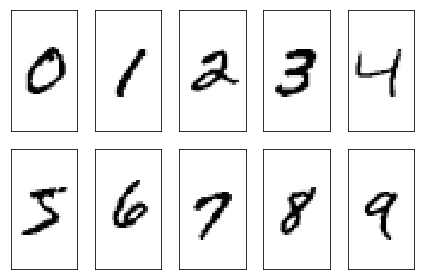

In [6]:
(x_train, y_train), (x_test, y_test) = load_mnist()
show_mnist_teaser()

### Your Turn! 
- Create a simple model just like the demo!

In [7]:
from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model

In [8]:
print 'x shape: ', x_train.shape, ' y: ', y_train.shape

x shape:  (60000, 28, 28, 1)  y:  (60000, 10)


In [13]:






# Implement a simple Convolution network here! 







### Slow start: Single input & output
- Model with only single input & output
- Such structure is able to create using Sequential API as well

In [7]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image
from keras.layers import Input, Activation, Dense, Flatten, MaxPooling2D, Conv2D, LSTM
from keras.models import Model
from keras.utils import plot_model

In [8]:
print 'x shape: ', x_train.shape, ' y: ', y_train.shape

x shape:  (60000, 28, 28, 1)  y:  (60000, 10)


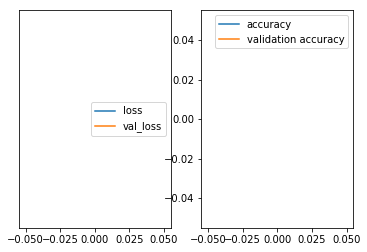

Epoch 2/10
27168/60000 [============>.................] - ETA: 38s - loss: 0.2970

KeyboardInterrupt: 

In [9]:
input_layer = Input(shape = x_train.shape[1:])

activation_1 = Activation('relu')(input_layer)
hidden_layer = Dense(50)(activation_1)
activation_2 = Activation('relu')(hidden_layer)
flat = Flatten()(activation_2)
output_layer = Dense(10, activation = 'softmax')(flat)

model = Model(inputs = input_layer, outputs = output_layer)
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, callbacks=[PlotLearning()])

### Merging layers
- Sometimes, it is necessary to merge layers (e.g., GoogleNet or ResNet)

#### 1. concatenate
- concatenate() simply merges results of two or more layers
- For instance, assume there are two layers to be concatenated, whose results are
**[x1, x2, ..., xn]** and **[y1, y2, ..., yn]**. Then, concatenated layer would be **[x1, ..., xn, ..., y1, ..., yn]**

In [ ]:
input_layer = Input(shape = X_data.shape[1:])
activation_1 = Activation('relu')(input_layer)
hidden_layer_1 = Dense(50, activation = 'relu')(activation_1)
hidden_layer_2 = Dense(50, activation = 'relu')(activation_1)
concat_layer = concatenate([hidden_layer_1, hidden_layer_2])
print(hidden_layer_1.shape)
print(hidden_layer_2.shape)
print(concat_layer.shape)

#### 2. add, subtract, multiply, average, maximum
- Such layers perform element-wise operations over all corresponding elements of two or more layers
- Hence, dimensionality of the input layers are preserved

In [ ]:
# creating layers
input_layer = Input(shape = X_data.shape[1:])
activation_1 = Activation('relu')(input_layer)
hidden_layer_1 = Dense(50, activation = 'relu')(activation_1)
hidden_layer_2 = Dense(50, activation = 'relu')(activation_1)
add_layer = add([hidden_layer_1, hidden_layer_2])
print(hidden_layer_1.shape)
print(hidden_layer_2.shape)
print(add_layer.shape)

#### 3. dot
- dot() performs inner product operation between two layer results
- 'axes' should be defined to perform the operation

In [ ]:
# creating layers
input_layer = Input(shape = X_data.shape[1:])
activation_1 = Activation('relu')(input_layer)
hidden_layer_1 = Dense(50, activation = 'relu')(activation_1)
hidden_layer_2 = Dense(50, activation = 'relu')(activation_1)
dot_layer = dot([hidden_layer_1, hidden_layer_2], axes = -1)
print(hidden_layer_1.shape)
print(hidden_layer_2.shape)
print(dot_layer.shape)

## Hands On! 

### My turn:

In [ ]:
visible = Input(shape=(2, ))
hidden = Dense(2)(visible)
model = Model(inputs=visible, outputs=hidden)
model.summary()

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')

### Your Turn: 

#### Exe1:
- Build the following network: Input -> Dense(10) -> Dense(2) -> Output

In [ ]:
inp = Input(shape=(2, ))

# x = ...

out = Dense(2)(x)
model = Model(inputs=inp, outputs=out)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')

#### Exe2: 
- Build the following network: Input -> Dense(2) -> Dense(5) -> Dense(7) -> Output

In [ ]:

# Your model goes here..
# ...
# .. 

model = Model(inputs=inp, outputs=out)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')

#### Exe3: 
- Build the following network: Input -> Dense(3) -> Dense(5) -> Dense(3) -> Output

In [ ]:

# Your model goes here..
# ...
# .. 

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')

### My Turn:
### Convolutional Neural Network

In [ ]:
visible = Input(shape=(28, 28, 1))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
hidden1 = Dense(10, activation='relu')(pool2)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
model.summary()
plot_model(model, to_file='cnn.png', show_shapes=True)
Image('cnn.png')

### Your Turn: 
Build the following network: (LeNet5)
- Conv2D(filters = 6, kernel_size = 5, activation = 'relu')
- MaxPooling2D(pool_size = 2, strides = 2)
- Conv2D(filters = 16, kernel_size = 5, activation = 'relu')
- MaxPooling2D(pool_size = 2, strides = 2)
- Flatten
- Dense(84)
- Dense(10, activation='softmax')

In [ ]:

# Your model goes here..
# ...
# .. 

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
Image('model_plot.png')

## Recurrent Neural Network

### Architecture of the network 
We now define the network, we do not consider the output nodes yet.
A single RNN cell is shown in the figure below in the middle:

<img style="width: 70%;" src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png"/>

The joining of the two lines coming from the previous state $h_{t-1}$ and the current x-values $x_t$ is a concatenation to a vector  $[h_{t-1}, x_{t}]$ of size `state_size + num_classes_in`. Alternatively, instead of concatenating, one could also use two matrices $W_x$ and $W_h$ and keep the states separate. This is mathematically completely identical. The new state $h_t$ is 
then calculated as:

$$
    h_{t} = \tanh([h_{t-1}, x_{t}] \cdot W + b) = \tanh(h_{t-1} \cdot W_h + x_{t} \cdot U + b)
$$

In [ ]:
visible = Input(shape=(100, 1))
hidden1 = LSTM(10)(visible)  
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
model.summary()
plot_model(model, to_file='rnn.png', show_shapes=True)
Image('rnn.png')

## Shared Input Layer

In [ ]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

visible = Input(shape=(64, 64, 1))

# first feature extractor
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)

# second feature extractor
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)

# merge feature extractors
merge = concatenate([flat1, flat2])

# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)

# prediction output
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

model.summary()
plot_model(model, to_file='shared_input_layer.png', show_shapes=True)
Image('shared_input_layer.png')

## Shared Feature Extraction Layer

In [ ]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate

visible = Input(shape=(100, 1))

# feature extraction
extract1 = LSTM(10)(visible)

# first interpretation model
interp1 = Dense(10, activation='relu')(extract1)

# second interpretation model
interp21 = Dense(10, activation='relu')(extract1)
interp22 = Dense(20, activation='relu')(interp21)
interp23 = Dense(10, activation='relu')(interp22)

# merge interpretation
merge = concatenate([interp1, interp23])

# output
output = Dense(1, activation='sigmoid')(merge)
model = Model(inputs=visible, outputs=output)

model.summary()
plot_model(model, to_file='shared_feature_extractor.png', show_shapes=True)

Image('shared_feature_extractor.png')

## Multiple Input Model

In [ ]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate

# first input model
visible1 = Input(shape=(64, 64, 1))
conv11 = Conv2D(32, kernel_size=4, activation='relu')(visible1)
pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
conv12 = Conv2D(16, kernel_size=4, activation='relu')(pool11)
pool12 = MaxPooling2D(pool_size=(2, 2))(conv12)
flat1 = Flatten()(pool12)

# second input model
visible2 = Input(shape=(32, 32, 3))
conv21 = Conv2D(32, kernel_size=4, activation='relu')(visible2)
pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
conv22 = Conv2D(16, kernel_size=4, activation='relu')(pool21)
pool22 = MaxPooling2D(pool_size=(2, 2))(conv22)
flat2 = Flatten()(pool22)

# merge input models
merge = concatenate([flat1, flat2])

# interpretation model
hidden1 = Dense(10, activation='relu')(merge)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=[visible1, visible2], outputs=output)

model.summary()
plot_model(model, to_file='multiple_inputs.png', show_shapes=True)
Image('multiple_inputs.png')

## Multipe Output Model

In [ ]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed

visible = Input(shape=(100, 1))

# feature extraction
# return_sequences=True
extract = LSTM(10, return_sequences=True)(visible)

# classification output
class11 = LSTM(10)(extract)
class12 = Dense(10, activation='relu')(class11)
output1 = Dense(1, activation='sigmoid')(class12)

# sequence output
output2 = TimeDistributed(Dense(1, activation='linear'))(extract)

model = Model(inputs=visible, outputs=[output1, output2])
model.summary()
plot_model(model, to_file='multiple_output.png', show_shapes=True)
Image('multiple_output.png')

# Advanced: Graph Neural Networks

Mathematically, the GCN model follows this formula:

$H^{(l+1)} = \sigma(\tilde{D}^{-\frac{1}{2}}\tilde{A}\tilde{D}^{-\frac{1}{2}}H^{(l)}W^{(l)})$

Here, $H^{(l)}$ denotes the $l^{th}$ layer in the network,
$\sigma$ is the non-linearity, and $W$ is the weight matrix for
this layer. $D$ and $A$, as commonly seen, represent degree
matrix and adjacency matrix, respectively. The ~ is a renormalization trick
in which we add a self-connection to each node of the graph, and build the
corresponding degree and adjacency matrix.  The shape of the input
$H^{(0)}$ is $N \times D$, where $N$ is the number of nodes
and $D$ is the number of input features. We can chain up multiple
layers as such to produce a node-level representation output with shape
$N \times F$, where $F$ is the dimension of the output node
feature vector.

The equation can be efficiently implemented using sparse matrix
multiplication kernels (such as Kipf's
`https://github.com/tkipf/pygcn`). The above DGL implementation
in fact has already used this trick due to the use of builtin functions. To
understand what is under the hood, please read the tutorial on page rank specified in this repository.

In [ ]:
%%bash
if [ ! -d "keras-deep-graph-learning" ] ; then git clone https://github.com/ypeleg/keras-deep-graph-learning; fi

In [ ]:
from tachles import fix_gcn_paths, load_mutag

In [ ]:
fix_gcn_paths()
import keras_dgl
from keras_dgl.layers import MultiGraphCNN, MultiGraphAttentionCNN
from examples.utils import normalize_adj_numpy, evaluate_preds, preprocess_edge_adj_tensor

In [ ]:
A, A_orig, X, Y, num_edge_features, num_graph_nodes, num_graphs, orig_num_graph_nodes, orig_num_graphs = load_mutag()
print X.shape, Y.shape, A.shape

In [ ]:
import keras.backend as K
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from keras.layers import Dense, Activation, Dropout, Input, Lambda
from keras.models import Model, Sequential
from keras.callbacks import Callback
from keras.regularizers import l2
from keras.optimizers import Adam

In [ ]:
def plot_graph(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    nx.draw_networkx(gr, ax=ax, with_labels=False, node_size=5, width=.5)
    ax.set_axis_off()
    plt.show()
    plt.close()

In [ ]:
print X[0]
# plot_graph(A)

----

<span style="float:right;">[[source]](https://github.com/vermaMachineLearning/keras-deep-graph-learning/blob/master/keras_dgl/layers/multi_graph_cnn_layer.py#L9)</span>
## MutliGraphCNN

```python
MutliGraphCNN(output_dim, num_filters, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
```

MutliGraphCNN assumes that the number of nodes for each graph in the dataset is same. For graph with arbitrary size, one can simply append appropriate zero rows or columns in adjacency matrix (and node feature matrix) based on max graph size in the dataset to achieve this uniformity.

__Arguments__

- __output_dim__: Positive integer, dimensionality of each graph node feature output space (or also referred dimension of graph node embedding).
- __num_filters__: Positive integer, number of graph filters used for constructing  __graph_conv_filters__ input.
- __activation__: Activation function to use
.
If you don't specify anything, no activation is applied
(ie. "linear" activation: `a(x) = x`).
- __use_bias__: Boolean, whether the layer uses a bias vector.
- __kernel_initializer__: Initializer for the `kernel` weights matrix
.
- __bias_initializer__: Initializer for the bias vector
.
- __kernel_regularizer__: Regularizer function applied to
the `kernel` weights matrix
.
- __bias_regularizer__: Regularizer function applied to the bias vector
.
- __activity_regularizer__: Regularizer function applied to
the output of the layer (its "activation").
.
- __kernel_constraint__: Constraint function applied to the kernel matrix
.
- __bias_constraint__: Constraint function applied to the bias vector
.

__Input shapes__

* __graph node feature matrix__ input as a 3D tensor with shape: `(batch_size, num_graph_nodes, input_dim)` corresponding to graph node input feature matrix for each graph.<br />
* __graph_conv_filters__ input as a 3D tensor with shape: `(batch_size, num_filters*num_graph_nodes, num_graph_nodes)` <br />
`num_filters` is different number of graph convolution filters to be applied on graph. For instance `num_filters` could be power of graph Laplacian.<br />

__Output shape__

* 3D tensor with shape: `(batch_size, num_graph_nodes, output_dim)`	representing convoluted output graph node embedding matrix for each graph in batch size.<br />



<span style="float:right;">[[source]](https://github.com/vermaMachineLearning/keras-deep-graph-learning/blob/master/examples/multi_gcnn_graph_classification_example.py)</span>

## The model itself

In [ ]:
num_filters = num_edge_features
graph_conv_filters = preprocess_edge_adj_tensor(A, symmetric=True)

In [ ]:
X_input = Input(shape=(X.shape[1], X.shape[2]))
graph_conv_filters_input = Input(shape=(graph_conv_filters.shape[1], graph_conv_filters.shape[2]))

# Your code here!

output = Dense(Y.shape[1])(output)
output = Activation('softmax')(output)

nb_epochs = 200
batch_size = 169

model = Model(inputs=[X_input, graph_conv_filters_input], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

In [ ]:
model.fit([X, graph_conv_filters], Y, batch_size=batch_size, validation_split=0.1, epochs=nb_epochs, shuffle=True, verbose=1)

__References__: <br />
[1] Kipf, Thomas N., and Max Welling. "Semi-supervised classification with graph convolutional networks." arXiv preprint arXiv:1609.02907 (2016). <br />
[2] Defferrard, Michaël, Xavier Bresson, and Pierre Vandergheynst. "Convolutional neural networks on graphs with fast localized spectral filtering." In Advances in Neural Information Processing Systems, pp. 3844-3852. 2016. <br />
[3] Simonovsky, Martin, and Nikos Komodakis. "Dynamic edge-conditioned filters in convolutional neural networks on graphs." In Proc. CVPR. 2017. <br />